## Aprendizaje automático, 2024-2025

## Práctica 2, Clustering

### Pareja
14

### Integrantes
Miguel Ibáñez González  
Alexandru Marius Platon

### Introducción

En esta práctica vas a programar el algoritmo de clustering K-Means y el algoritmo EM para una mezcla de gausianas. Compararás tu implementación con la de scikit-learn. El material de la práctica incluye:

- El fichero ``aa_p2.py``, en el que deberás completar el código de las clases ``KMeans`` y ``GMM``.

- Este notebook, ``aa_p2.ipynb``, en el que se describen los ejercicios y se incluyen algunos tests para tu código. El notebook importa algunas clases y funciones del fichero ``aa_p2.py``, por lo que este último deberá estar accesible en el *import path*.



### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import p2_14_ibañez_platon as aa_p2

### Algoritmo K-Means

Completa, en el fichero ``aa_p2.py``, el código de la clase ``KMeans``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo K-Means para ajustar ``self.num_clusters`` clusters a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros de los clusters se almacenarán en la lista ``self.centers``.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n,)`` con el índice del cluster al que pertenece cada punto. El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

- ``get_centers(self)``: Devuelve los centros de los clusters como una lista de arrays de numpy, cada uno de dimensiones ``(d,)``.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con los siguientes tests (no exhaustivos).

In [2]:
importlib.reload(aa_p2)
from p2_14_ibañez_platon import KMeans, plotModel

Carga de datos (Iris):

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
t = iris.target

Ejecución del algoritmo:

In [4]:
km = KMeans(3, 10, random_state=13)
km.fit(x)
y = km.predict(x)
c = km.get_centers()

Visualización de los resultados:

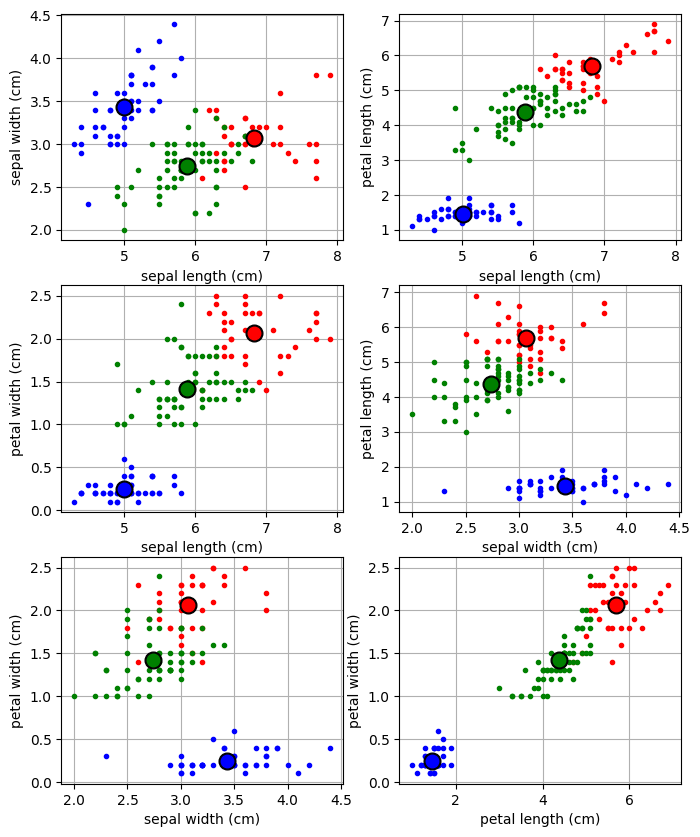

In [5]:
plt.figure(figsize=(8,10))
n_classes = 3

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    xplot = x[:, pair]

    plt.subplot(3, 2, pairidx + 1)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.grid(True)

    plotModel(xplot, y, "", centers=c[:, pair])

plt.show()

Creación de datos (make_blobs):

In [6]:
from sklearn.datasets import make_blobs
x, t = make_blobs(n_samples=500, n_features=2, centers=5, shuffle=True, random_state=15)

Ejecución del algoritmo y visualización de resultados:

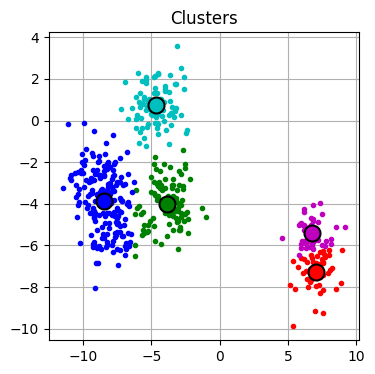

In [7]:
km = KMeans(5, 10)
km.fit(x)
y = km.predict(x)
c = km.get_centers()
plotModel(x, y, "Clusters", centers=c, new_figure=True)

### Pruebas del código y comparación con scikit-learn

Las pruebas anteriores son sólo una guía y no pretenden ser exhaustivas. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.cluster.KMeans](https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

## Consideraciones de las Pruebas de Kmeans y GMM

En las siguientes pruebas se ha comprobado el correcto funcionamiento de nuestros modelos, tanto por separado como haciendo comparaciones con los modelos dado por scikit-learn.   

Hemos visto que el modelo GMM de scikit-learn utiliza por defecto K-Means para seleccionar los centros. Para que las comparaciones sean lo mas justas posible, cuando se usa el modelo scikit-learn, se ha establecido que este también utilice valores aleatorios tomados desde los datos para incializar los centros de los clústers, ya que así es como se hace en nuestro modelo por defecto. 

Hemos creado también una función que inicializa los centros tomando una heurística distinta, en concreto, tomando como centros los puntos más alejados entre sí. De esta forma también se comprobó que se obtienen generalmente mejores resultados que inicializando los centros de forma aleatoria.  

En estas pruebas que hemos realizado utilizamos las métricas del indice de silueta y del índice de homogeneidad del módulo sklearn.metrics, para nuestra versión del modelo y para la versión de scikit-learn.

La función silhouette score devuelve valores entre -1 y 1 para indicar la calidad del modelo de clustering, evaluando la forma en la que se agrupan los distintos puntos. Esta no muestra necesariamente si los puntos han sido asignados en el clúster correcto, si no que se centra en la distancia que hay entre un punto con el cluster al que pertenece y con el siguiente mas cercano.  
El valor 1 indica una buena agrupación de los puntos, el 0 indica que los puntos suelen estar en la frontera entre clústers y -1, indica que los puntos estan mal agrupados.  

Por otro lado la función homogeneity score sí que indica la precisión de asginaación de los puntos a sus correspondientes clúster inciales, comparando las etiquetas originales devueltas por make_blobs con las devueltas por el respectivo modelo. En este caso, la función devuelve valores entre 1 y 0, 1 mostrando un etiquetado perfectamente homogéneo.



### Comparación Visual entre Kmeans y scikit-learn

Hemos realizado una serie de tests para comparar nustra implementación de Kmeans frente a la de scitkit-learn, con distintos valore de iteraciones y clusters.  


Número de muestras: 1000, Número de clusters: 3
Silhouette Score (Nuestro): 0.5042799472676144
Homogeneity Score (Nuestro): 0.5791701537780045
Silhouette Score (scikit-learn): 0.8435705873891368
Homogeneity Score (scikit-learn): 1.0


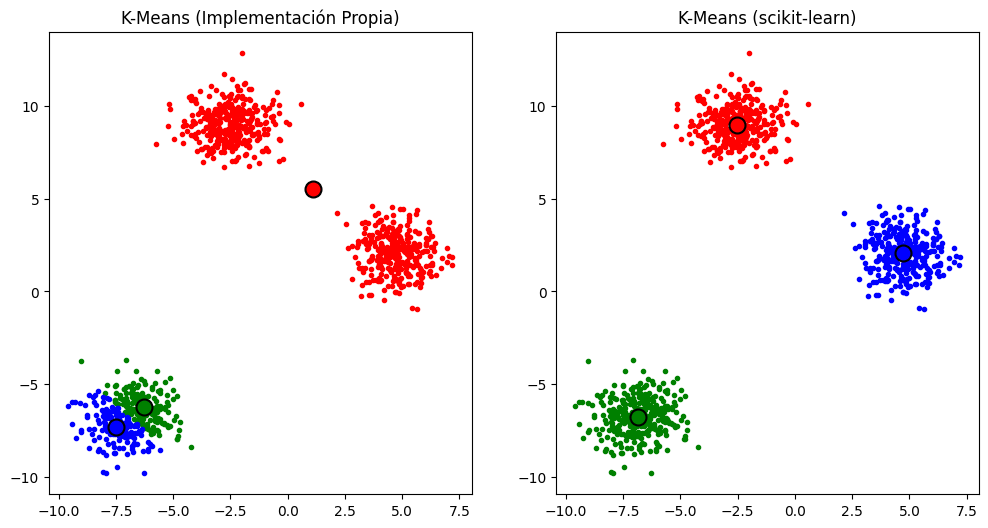

Número de muestras: 5000, Número de clusters: 4
Silhouette Score (Nuestro): 0.6048673379708536
Homogeneity Score (Nuestro): 0.7500000000000001
Silhouette Score (scikit-learn): 0.7893233776963794
Homogeneity Score (scikit-learn): 0.9976540339623056


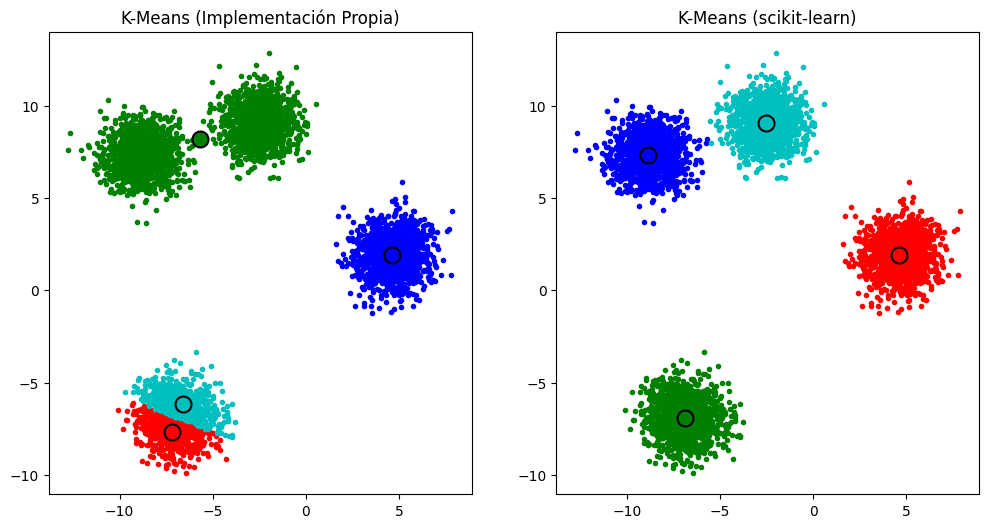

Número de muestras: 10000, Número de clusters: 5
Silhouette Score (Nuestro): 0.6130738179865828
Homogeneity Score (Nuestro): 0.8214788924044526
Silhouette Score (scikit-learn): 0.6695123156979134
Homogeneity Score (scikit-learn): 0.9489592909337697


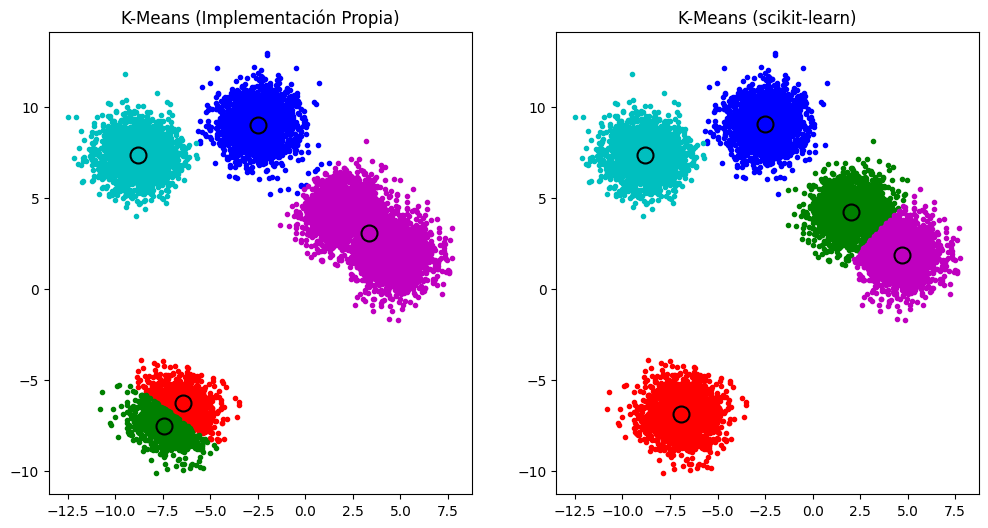

Número de muestras: 10000, Número de clusters: 7
Silhouette Score (Nuestro): 0.599692459022863
Homogeneity Score (Nuestro): 0.9176236246942796
Silhouette Score (scikit-learn): 0.5997251142385761
Homogeneity Score (scikit-learn): 0.9171016647081657


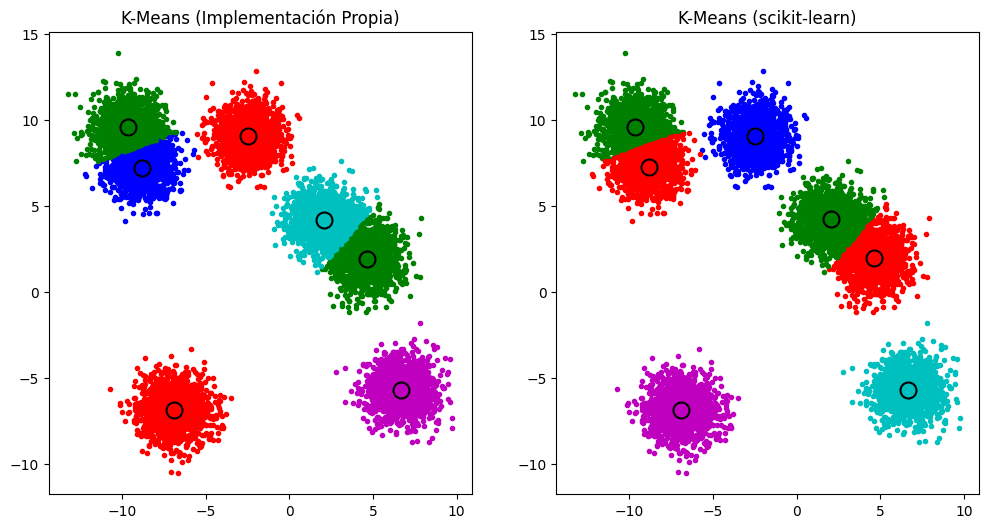

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.cluster import KMeans as SKLearnKMeans


def test_kmeans(num_samples, num_clusters, dimensions=2, random_state=42):
    
    x, t = make_blobs(n_samples=num_samples, n_features=dimensions, centers=num_clusters, random_state=random_state)
    
    # Inicializamos y entrenamos nuestro KMeans
    km = KMeans(num_clusters=num_clusters, num_iters=50, random_state=random_state)
    km.fit(x)
    y_pred_own = km.predict(x)
    c_own = np.array(km.get_centers())

    # Utilizamos también la implementación de scikit-learn para comparar
    sklearn_kmeans = SKLearnKMeans(n_clusters=num_clusters, random_state=random_state)
    y_pred_sklearn = sklearn_kmeans.fit_predict(x)
    c_sklearn = sklearn_kmeans.cluster_centers_

    # Calculamos el Silhouette Score para ambas implementaciones
    score_own = silhouette_score(x, y_pred_own)
    score_sklearn = silhouette_score(x, y_pred_sklearn)

    # Calculamos el Homogeneity Score para ambas implementaciones
    precision_own_homogeneity = homogeneity_score(t, y_pred_own)
    precision_sklearn_homogeneity = homogeneity_score(t, y_pred_sklearn)
    
    print(f"Número de muestras: {num_samples}, Número de clusters: {num_clusters}")
    print(f"Silhouette Score (Nuestro): {score_own}")
    print(f"Homogeneity Score (Nuestro): {precision_own_homogeneity}")
    print(f"Silhouette Score (scikit-learn): {score_sklearn}")
    print(f"Homogeneity Score (scikit-learn): {precision_sklearn_homogeneity}")

    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title("K-Means (Implementación Propia)")
    plotModel(x, y_pred_own, f"K-Means Propio (n_samples={num_samples}, n_clusters={num_clusters})", centers=c_own)
    
    plt.subplot(1, 2, 2)
    plt.title("K-Means (scikit-learn)")
    plotModel(x, y_pred_sklearn, f"K-Means scikit-learn (n_samples={num_samples}, n_clusters={num_clusters})", centers=c_sklearn)
    
    plt.show()
    
test_kmeans(1000, 3)
test_kmeans(5000, 4)
test_kmeans(10000, 5)
test_kmeans(10000, 7)



### Prueba con datos aleatorios

Esta prueba la hemos realizado para ver cómo KMeans reacciona ante datos sin estructura de agrupamiento natural. Como los puntos están distribuidos aleatoriamente, los clusters formados por KMeans son menos significativos y reflejan más los intentos del algoritmo de dividir el espacio en regiones equitativas. 

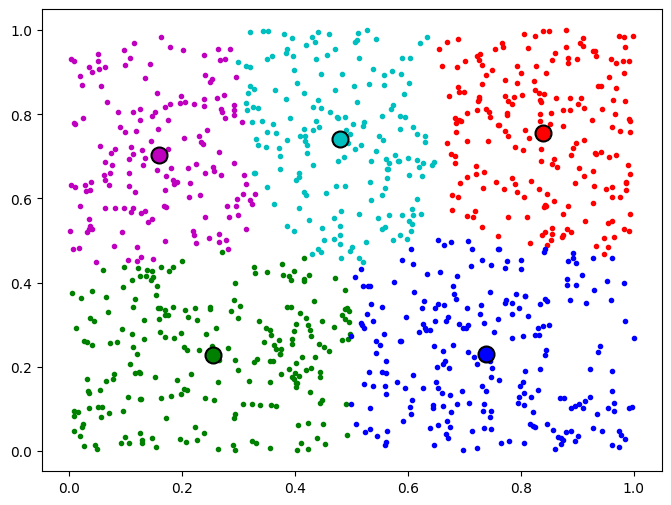

In [9]:
x_random = np.random.rand(1000, 2)  

km = KMeans(num_clusters=5, num_iters=50, random_state=42)
km.fit(x_random)
y_pred_random = km.predict(x_random)
c_random = np.array(km.get_centers())

plt.figure(figsize=(8, 6))
plotModel(x_random, y_pred_random, "K-Means en datos aleatorios", centers=c_random)
plt.show()


### Pruebas con valores grandes

Esta prueba se ha realizado para ver como la implementación de KMeans produce resultados similares a la implementación de scikit-learn en términos de calidad del agrupamiento para muchos valores distintos de cluster y samples. 

In [10]:
from sklearn.metrics import silhouette_score as sk_silhouette_score

silhouette_scores = []

for num_clusters in [3, 5, 7, 10]:
    for num_samples in [1000, 5000, 10000]:
        x, t = make_blobs(n_samples=num_samples, n_features=2, centers=num_clusters, random_state=42)
        
        km = KMeans(num_clusters=num_clusters, num_iters=1000, random_state=42)
        km.fit(x)
        y_pred_own = km.predict(x)
   
        km_sklearn = SKLearnKMeans(n_clusters=num_clusters, random_state=42)
        y_pred_sklearn = km_sklearn.fit_predict(x)
        
        score_own = silhouette_score(x, y_pred_own)
        score_sklearn = sk_silhouette_score(x, y_pred_sklearn)

        precision_own_homogeneity = homogeneity_score(t, y_pred_own)
        precision_sklearn_homogeneity = homogeneity_score(t, y_pred_sklearn)
        
        silhouette_scores.append((num_samples, num_clusters, score_own, score_sklearn))

print("\nResumen de Silhouette Scores (Nuestro vs scikit-learn):")
for samples, clusters, score_own, score_sklearn in silhouette_scores:
    print(f"n_samples: {samples}, n_clusters: {clusters}, Silhouette Score Nuestro: {score_own}, Silhouette Score scikit-learn: {score_sklearn}, Homogeneity Score Nuestro: {precision_own_homogeneity}, Homogeneity Score scikit-learn: {precision_sklearn_homogeneity}")


Resumen de Silhouette Scores (Nuestro vs scikit-learn):
n_samples: 1000, n_clusters: 3, Silhouette Score Nuestro: 0.5042799472676144, Silhouette Score scikit-learn: 0.8435705873891368, Homogeneity Score Nuestro: 0.8886250659296626, Homogeneity Score scikit-learn: 0.8552755987403018
n_samples: 5000, n_clusters: 3, Silhouette Score Nuestro: 0.841632632352753, Silhouette Score scikit-learn: 0.841632632352753, Homogeneity Score Nuestro: 0.8886250659296626, Homogeneity Score scikit-learn: 0.8552755987403018
n_samples: 10000, n_clusters: 3, Silhouette Score Nuestro: 0.8411357171702263, Silhouette Score scikit-learn: 0.8411357171702263, Homogeneity Score Nuestro: 0.8886250659296626, Homogeneity Score scikit-learn: 0.8552755987403018
n_samples: 1000, n_clusters: 5, Silhouette Score Nuestro: 0.6779388924748059, Silhouette Score scikit-learn: 0.6779388924748059, Homogeneity Score Nuestro: 0.8886250659296626, Homogeneity Score scikit-learn: 0.8552755987403018
n_samples: 5000, n_clusters: 5, Silh

### Prueba de resdistribución de Pixels

Esta prueba muestra cómo puede aplicarse KMeans para la compresión y simplificación de imágenes, reduciendo cada imagen a una representación con 2 niveles de intensidad.   
En el resultado de las imágenes se pude ver que Kmeans logra identificar patrones básicos en cada segmento de las imágenes.  
Esta reconsrucción ha dado algunos problemas con el algoritmo Kmeans, en cambio con Kmeans++ a parte de tardar menos los resultados son mucho mejores, con mas niveles de intensidad (clusters) se pueden visualizar mejor las imagenes (con más variedad de grises).

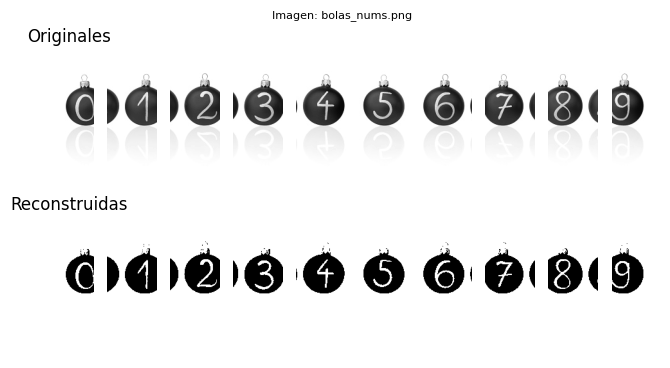

d:\master\aprendizaje_automatico\2p\p2_14_ibáñez_platon\p2_14_ibañez_platon.py:107: RuntimeWarning: Mean of empty slice.
  new_centers = np.array([x[labels == i].mean(axis=0) for i in range(self.num_clusters)])
C:\Users\Alex\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


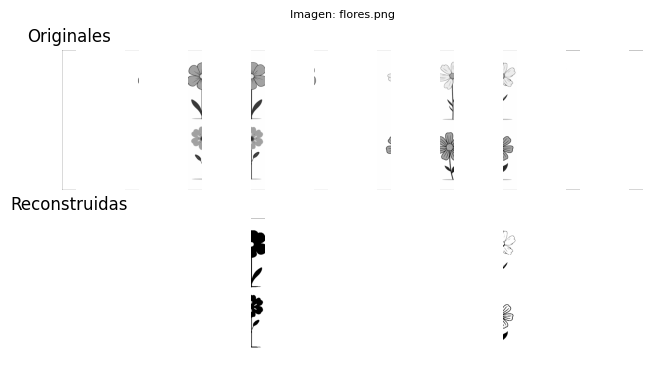

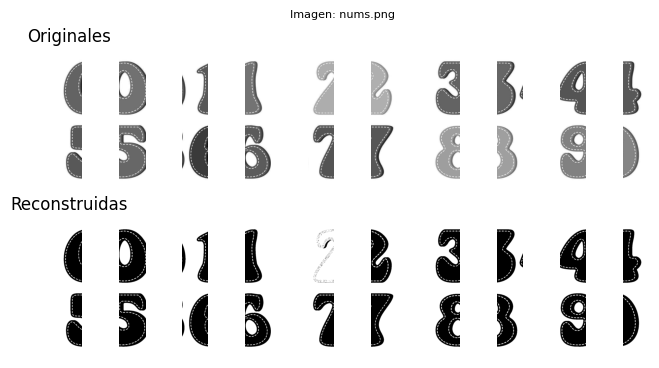

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimimos advertencias de convergencia (no es necesarios lo usamos para que quede más limpio el output)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

images_dir = 'images'
image_files = [f for f in os.listdir(images_dir) if f.endswith('.png') or f.endswith('.jpg')]

for img_file in image_files:
    img_path = os.path.join(images_dir, img_file)
    img = Image.open(img_path).convert("L")  # Convertimos a escala de grises
    img_array = np.array(img)  # Convertimos la imagen a un array de numpy
    
    # Dividimos el ancho de las imágenes en partes iguales
    img_parts = 10
    img_width = img_array.shape[1] // img_parts
    images = []
    
    # Recortamos cada parte de la imagen principal
    for i in range(img_parts):
        part_img = img_array[:, i * img_width: (i + 1) * img_width]
        images.append(part_img.flatten() / 255.0)  
    
    # Aplicamos KMeans y reconstruimos cada parte de la imagen
    reconstructed_images = []
    for idx, img in enumerate(images):
        kmeans = KMeans(num_clusters=2, num_iters=1000, random_state=0)
        kmeans.fit(img.reshape(-1, 1))
        clustered = kmeans.predict(img.reshape(-1, 1))
        compressed_img = kmeans.get_centers()[clustered].reshape(img_array.shape[0], img_width)
        reconstructed_images.append(compressed_img)
    
    fig, axes = plt.subplots(2, img_parts, figsize=(8, 4))
    fig.suptitle(f"Imagen: {img_file}", fontsize=8)
    for i, (original, reconstructed) in enumerate(zip(images, reconstructed_images)):
        axes[0, i].imshow(original.reshape(img_array.shape[0], img_width), cmap="gray")
        axes[0, i].axis("off")
        axes[1, i].imshow(reconstructed, cmap="gray")
        axes[1, i].axis("off")

    axes[0, 0].set_title("Originales", fontsize=12)
    axes[1, 0].set_title("Reconstruidas", fontsize=12)
    plt.show()


## Conclusiones

#### Precisión de la Implementación Propia de KMeans:

Nuestra implementación de KMeans produce Silhouette Scores y Homogeneity Score bastante parecidos a los que obtenemos por la implementación de scikit-learn en la mayoría de las configuraciones, indicando que el algoritmo que hemos realizado está correctamente alineado en cuanto a la asignación de clusters.  
Hay algunas variaciones en unas pocas configuraciones, que pueden deberse a que nustro algoritmo tiene pequeñas diferencias en la inicialización o iteración del algoritmo.   
Con la inicialización de centros Kmeans++ los resultados son muchos más parecidos a los de scikit-learn incluso mejores.

#### Impacto del Número de Clusters en la Calidad del Agrupamiento:

En ambas implementaciones, el Silhouette Score suele ser más alto con un menor número de clusters y disminuye ligeramente a medida que se incrementa el número de clusters.
Esto pasa porque los datos generados tienen una estructura de agrupamiento más clara cuando se dividen en un número más pequeño de clusters, y el algoritmo comienza a fragmentar los clusters naturales cuando aumenta el valor de num_clusters.

### Algoritmo EM para una mezcla de gausianas

Completa, en el fichero ``aa_p2.py``, el código de la clase ``GMM``. Debes incluir al menos los dos métodos siguientes, respetando su interfaz:

- ``fit(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y ejecuta el algoritmo EM para ajustar una mezcla de ``self.num_components`` componentes gausianas a los datos. El número de iteraciones del algoritmo vendrá dado por ``self.num_iters``. Los centros, covarianzas y prioris de cada componente se almacenarán en las listas ``self.centers``, ``self.covariances`` y ``self.weights``, respectivamente.

- ``predict(self, x)``: Recibe un array de numpy de dimensiones ``(n, d)``, donde ``n`` es el número de puntos y ``d`` es su dimensión, y devuelve un array de numpy de dimensiones ``(n, self.num_components)`` con las probabilidades de pertenencia de cada punto a cada una de las componentes (la suma por filas debe ser 1). El método ``predict`` no se puede invocar sobre un objeto si no se ha hecho ``fit`` previamente.

Puedes incluir otros métodos auxiliares si lo consideras necesario.

Una vez programado, puedes probar el código con el siguiente test (no exhaustivo).

In [12]:
importlib.reload(aa_p2)
from p2_14_ibañez_platon import GMM, plotModelGMM

Creación de datos (make_blobs):

(4000, 2)


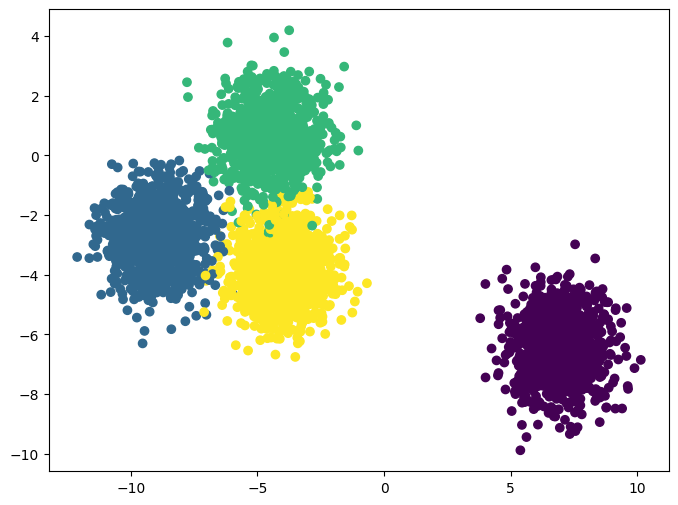

In [13]:
x, t = make_blobs(n_samples=4000, n_features=2, centers=4, shuffle=True, random_state=15)
print(x.shape)
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=t, cmap='viridis')

Ajuste a los datos de una mezcla de gausianas y visualización de los resultados:

GMM


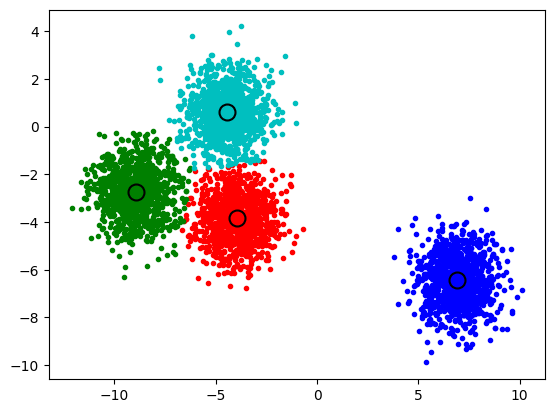

In [14]:
importlib.reload(aa_p2)
from p2_14_ibañez_platon import GMM, plotModelGMM
gmm = GMM(4, 100, random_state=1)
gmm.fit(x)
y = gmm.predict(x)
plotModel(x, np.argmax(y, axis=1), "Clusters", centers=gmm.centers)


### Pruebas del código y comparación con scikit-learn

La prueba anterior es sólo una guía y no pretende ser exhaustiva. Incluye en este apartado de la práctica un conjunto de pruebas para verificar que el algoritmo funciona bien. Estas pruebas deben incluir una comparación con [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) de scikit-learn.

Comenta tus resultados y explica las diferencias observadas, en caso de que las haya.

## Indices de silueta y homogeneidad

In [15]:
from sklearn.metrics import silhouette_score, homogeneity_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture as SKLearnGMM

gmm = GMM(4, 10, random_state=1)
gmm.fit(x)
skl_gmm = SKLearnGMM(n_components=4, max_iter=10, random_state=1, init_params='random_from_data')
skl_gmm.fit(x)


y_gmm = gmm.predict(x)
y_sklearn = skl_gmm.predict(x)


silhouette_custom = silhouette_score(x, np.argmax(y_gmm, axis=1))
silhouette_sklearn = silhouette_score(x, y_sklearn)

precision_custom_homogeneity = homogeneity_score(t, np.argmax(y_gmm, axis=1))
precision_sklearn_homogeneity = homogeneity_score(t, y_sklearn)

print("Silhouette Score (Nuestro):", silhouette_custom)
print("Silhouette Score (scikit-learn):", silhouette_sklearn)
print("Homogeneity Score (Nuestro):", precision_custom_homogeneity)
print("Homogeneity Score (scikit-learn):", precision_sklearn_homogeneity)


GMM
Silhouette Score (Nuestro): 0.38714688002012976
Silhouette Score (scikit-learn): 0.571400314674697
Homogeneity Score (Nuestro): 0.7169495835973946
Homogeneity Score (scikit-learn): 0.7963256385246288


En el codigo anterior hemos realizado una prueba sencilla usando la métricas del indice de silueta y del índice de homogeneidad del módulo sklearn.metrics, para nuestra versión del modelo y para la versión de scikit-learn. Como se dijo en las consideraciones iniciales, estas métricas indican la precisión de la clasificación de los datos y el grado de agrupamiento en los clústers.

## Pruebas variando hiperparametros y número de muestras

GMM


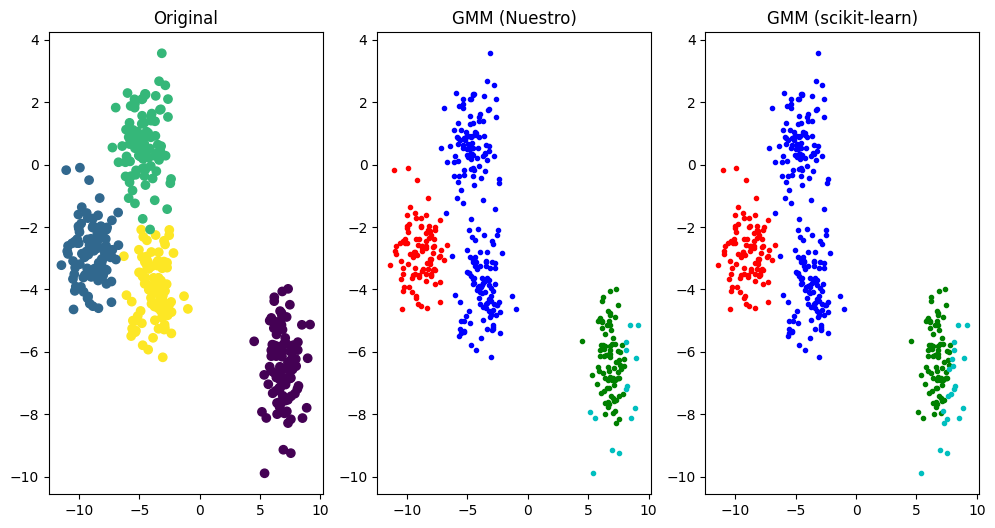

Número de muestras: 400, Número de clusters: 4
Silhouette Score (Nuestro): 0.4383582736526951
Silhouette Score (scikit-learn): 0.43077543384688327
Homogeneity Score (Nuestro): 0.7386373100349755
Homogeneity Score (scikit-learn): 0.7386373100349755
GMM


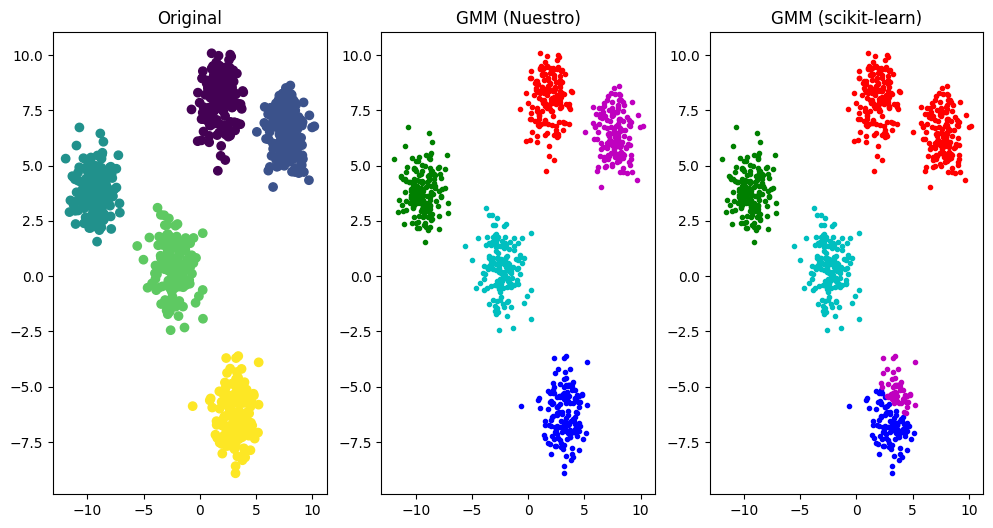

Número de muestras: 800, Número de clusters: 5
Silhouette Score (Nuestro): 0.7488451789599796
Silhouette Score (scikit-learn): 0.6097271896027623
Homogeneity Score (Nuestro): 1.0
Homogeneity Score (scikit-learn): 0.8277293767706425
GMM


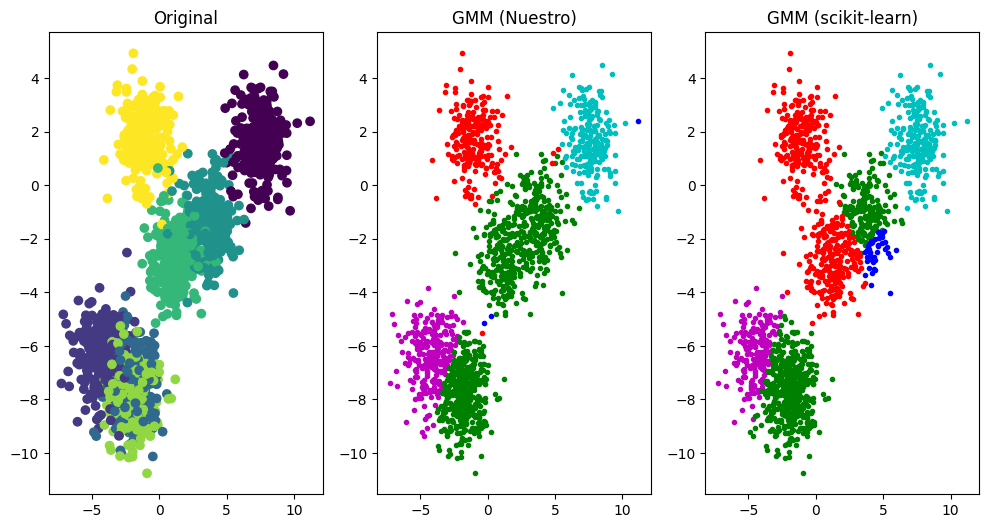

Número de muestras: 1600, Número de clusters: 7
Silhouette Score (Nuestro): 0.4756624383670144
Silhouette Score (scikit-learn): 0.46768762920814266
Homogeneity Score (Nuestro): 0.7137633649766744
Homogeneity Score (scikit-learn): 0.7693557316507971
GMM


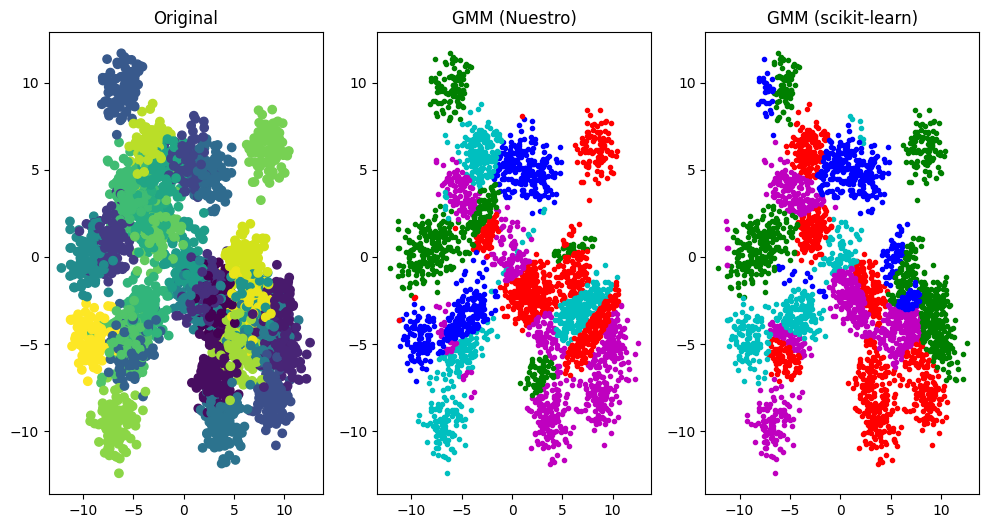

Número de muestras: 3200, Número de clusters: 30
Silhouette Score (Nuestro): 0.26525628120510575
Silhouette Score (scikit-learn): 0.3127341850372658
Homogeneity Score (Nuestro): 0.7099198142972687
Homogeneity Score (scikit-learn): 0.7255112168029849


In [16]:
def test_gmm(x , t, num_samples = 400, num_clusters = 4, random_state=42, num_iter=50):

    gmm = GMM(num_components=num_clusters, num_iters=num_iter, random_state=random_state)
    gmm.fit(x)
    y_our = np.argmax(gmm.predict(x), axis=1)
    

    skl_gmm = SKLearnGMM(n_components=num_clusters, max_iter=num_iter, random_state=random_state, init_params='random_from_data')
    skl_gmm.fit(x)
    y_sklearn = skl_gmm.predict(x)
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.scatter(x[:, 0], x[:, 1], c=t, cmap='viridis')    
    
    plt.subplot(1, 3, 2)
    plt.title("GMM (Nuestro)")
    plotModel(x, y_our, f"GMM Propio (n_samples={num_samples}, n_clusters={num_clusters})")
    
    plt.subplot(1, 3, 3)
    plt.title("GMM (scikit-learn)")
    plotModel(x, y_sklearn, f"GMM scikit-learn (n_samples={num_samples}, n_clusters={num_clusters})")
    
    plt.show()

    print(f"Número de muestras: {num_samples}, Número de clusters: {num_clusters}")
    print(f"Silhouette Score (Nuestro): {silhouette_score(x, y_our)}")
    print(f"Silhouette Score (scikit-learn): {silhouette_score(x, y_sklearn)}")
    print(f"Homogeneity Score (Nuestro): {homogeneity_score(t, y_our)}")
    print(f"Homogeneity Score (scikit-learn): {homogeneity_score(t, y_sklearn)}")

x, t = make_blobs(n_samples=400, n_features=2, centers=4, shuffle=True, random_state=15)
test_gmm(x, t, 400, 4, 1, 50)
x, t = make_blobs(n_samples=800, n_features=2, centers=5, shuffle=True, random_state=20)
test_gmm(x,t, 800, 5, 1, 100)
x, t = make_blobs(n_samples=1600, n_features=2, centers=7, shuffle=True, random_state=25)
test_gmm(x, t, 1600, 7, 1, 200)
x, t = make_blobs(n_samples=3200, n_features=2, centers=30, shuffle=True, random_state=30)
test_gmm(x, t, 3200, 30, 1, 400)




En el código anterior utilizamos nuevamente las métricas de los índices de silueta y homogeneidad para evaluar el comportamiento de los modelos. En este caso también utilizmaos los gráficos de dispersión obtenidos por cada modelo para observar de manera más visual la compración entre ambas versiones, y también la comparación con los datos originales.  
En cada una de las ejecuciones se han ido variando los distintos hiperparámetros de los modelos, como el número de iteraciones o el número de clústers, así como el tamaño de muestra proporcionado.  
Se observa que el nuestro modelo y el de scikit obtienen resultados muy similares para todas las pruebas.

## Prueba utilizando un conjunto de datos grande

GMM
Silhouette Score (Nuestro): 0.47024661051761985
Homogeneity Score (Nuestro): 0.7979541266379976


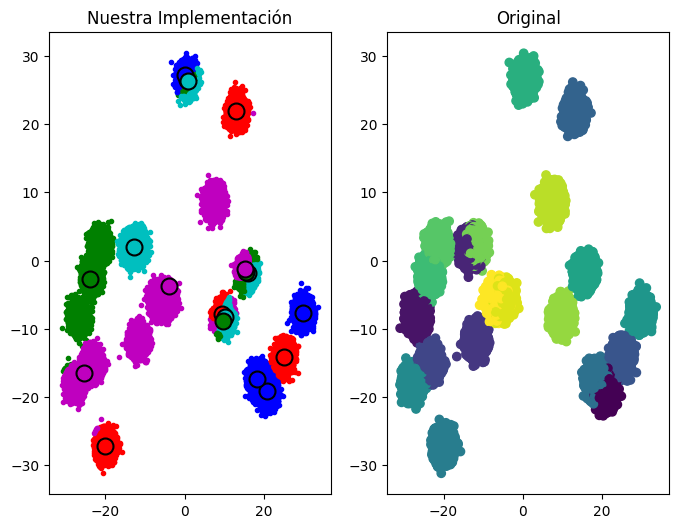

In [17]:
importlib.reload(aa_p2)
from p2_14_ibañez_platon import GMM, plotModelGMM
x, t = make_blobs(n_samples=100000, n_features=2, centers=20, shuffle=True, random_state=15, center_box=(-30, 30))
gmm = GMM(20, 100, random_state=1)
gmm.fit(x)
y = np.argmax(gmm.predict(x), axis=1)
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plt.title("Nuestra Implementación")
plotModel(x, y, "Clusters", centers=gmm.centers)
plt.subplot(1, 2, 2)
plt.title("Original")
plt.scatter(x[:,0], x[:,1], c=t, cmap='viridis')

print("Silhouette Score (Nuestro):", silhouette_score(x, y))
print("Homogeneity Score (Nuestro):", homogeneity_score(t, y))


En este caso probamos el modelo utilizando una gran cantidad de muestras iniciales, correspondientes a varios clústers distintos. Vemos que el tiempo ejecución es considerablemente más elevado que en los casos anteriores, pero el modelo hace una estimación razonablemente acertada a la hora de clasificar los púntos en los diferentes clústers. La métrica de homogeneidad revela un 80% (aprox.) de clasificación correcta para los distintos puntos, mientras que el índice de silueta muestra valores bastante bajos. Esto se debe a que, como se puede ver en la imágen de la derecha, los clústers iniciales se llegan a solapar en muchos puntos, lo que provoca que esta métrica no devuelve un alto grado de separabilidad en general.

## Pruebas introduciendo outliers a los datos

GMM


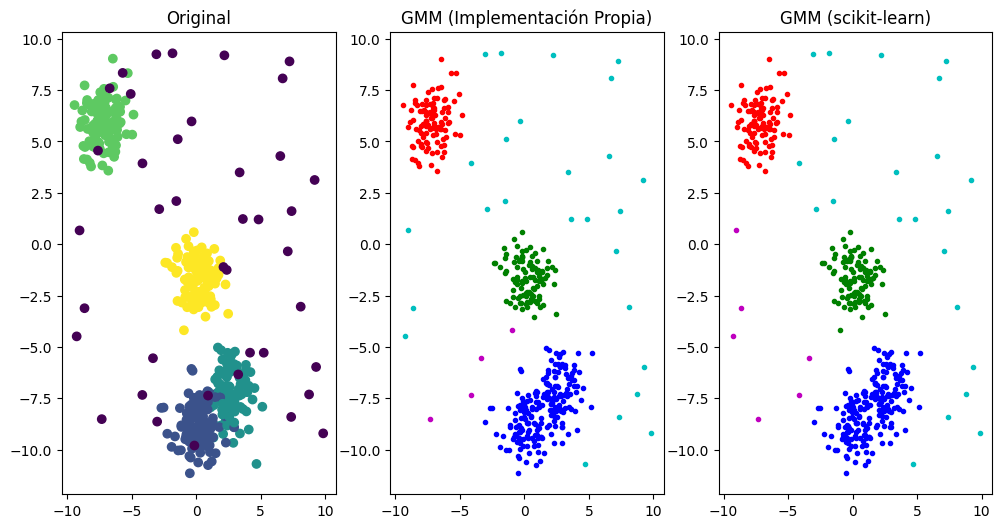

Número de muestras: 400, Número de clusters: 4
Silhouette Score (Nuestro): 0.5960781976659306
Silhouette Score (scikit-learn): 0.638196452835864
Homogeneity Score (Nuestro): 0.7120080841773422
Homogeneity Score (scikit-learn): 0.7154277262537703
GMM


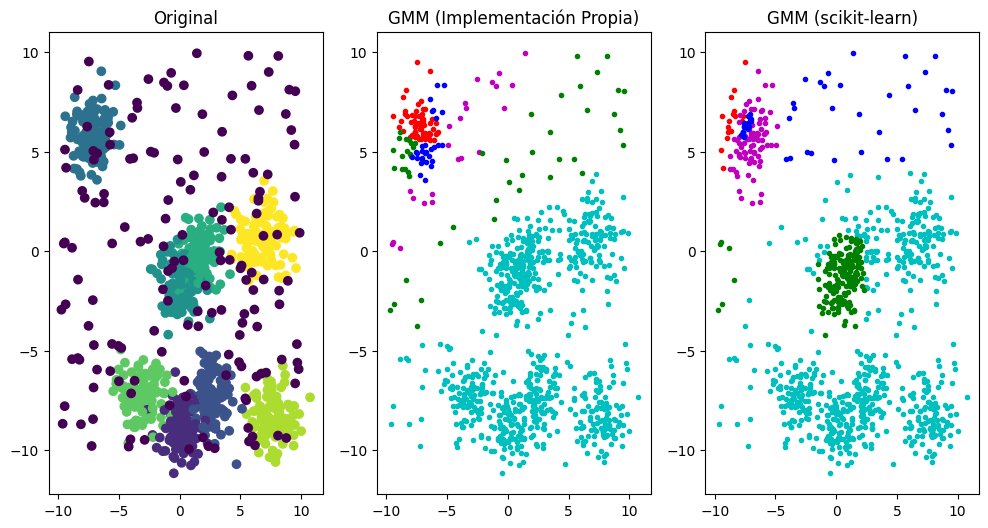

Número de muestras: 800, Número de clusters: 8
Silhouette Score (Nuestro): 0.36450712324451673
Silhouette Score (scikit-learn): 0.28825809938719155
Homogeneity Score (Nuestro): 0.4207164016541167
Homogeneity Score (scikit-learn): 0.4662338879415321
GMM


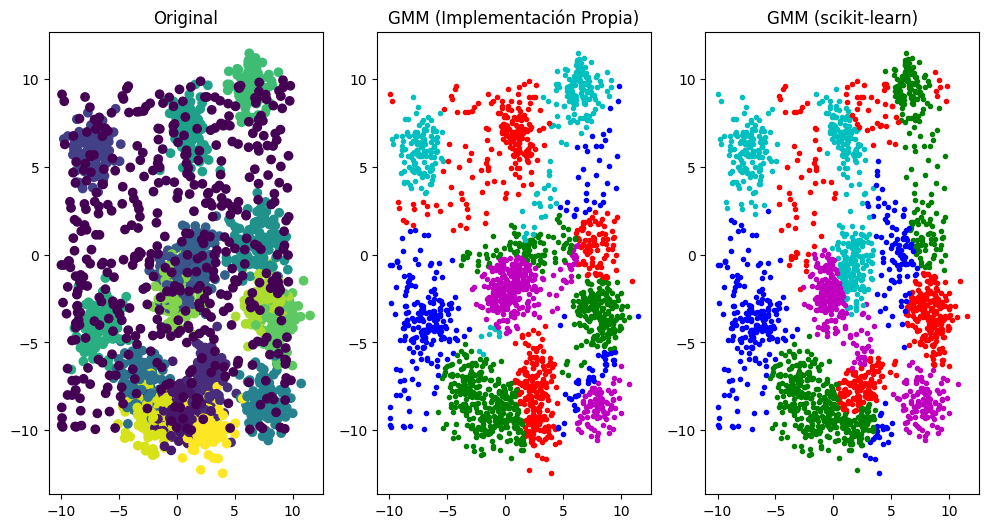

Número de muestras: 1600, Número de clusters: 16
Silhouette Score (Nuestro): 0.380210259583866
Silhouette Score (scikit-learn): 0.3811800300525483
Homogeneity Score (Nuestro): 0.6346133703316326
Homogeneity Score (scikit-learn): 0.6575584267099794


In [18]:
def outliers_test(num_samples, percentage_outliers, num_iter=50, num_clusters=4, random_state=1):

    x, t = make_blobs(n_samples=num_samples, n_features=2, centers=num_clusters, shuffle=True, random_state=125)
    num_outliers = int(num_samples * percentage_outliers)
    outliers = np.random.uniform(low=-10, high=10, size=(num_outliers, 2))
    x_with_outliers = np.vstack([x, outliers])
    t_with_outliers = np.hstack([t, [-1]*num_outliers])

    gmm = GMM(num_components=num_clusters+1, num_iters=num_iter, random_state=random_state)
    gmm.fit(x_with_outliers)
    y_our = np.argmax(gmm.predict(x_with_outliers), axis=1)
    

    skl_gmm = SKLearnGMM(n_components=num_clusters+1, max_iter=num_iter, random_state=random_state, init_params='random_from_data')
    skl_gmm.fit(x_with_outliers)
    y_sklearn = skl_gmm.predict(x_with_outliers)
    
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.scatter(x_with_outliers[:, 0], x_with_outliers[:, 1], c=t_with_outliers, cmap='viridis')    
    
    plt.subplot(1, 3, 2)
    plt.title("GMM (Implementación Propia)")
    plotModel(x_with_outliers, y_our, f"GMM Propio (n_samples={num_samples}, n_clusters={num_clusters})")
    
    plt.subplot(1, 3, 3)
    plt.title("GMM (scikit-learn)")
    plotModel(x_with_outliers, y_sklearn, f"GMM scikit-learn (n_samples={num_samples}, n_clusters={num_clusters})")
    
    plt.show()

    print(f"Número de muestras: {num_samples}, Número de clusters: {num_clusters}")
    print(f"Silhouette Score (Nuestro): {silhouette_score(x_with_outliers, y_our)}")
    print(f"Silhouette Score (scikit-learn): {silhouette_score(x_with_outliers, y_sklearn)}")
    print(f"Homogeneity Score (Nuestro): {homogeneity_score(t_with_outliers, y_our)}")
    print(f"Homogeneity Score (scikit-learn): {homogeneity_score(t_with_outliers, y_sklearn)}")

outliers_test(400, 0.1, num_clusters=4)
outliers_test(800, 0.2, num_clusters=8)
outliers_test(1600, 0.3, num_clusters=16)
    

En este apartado generamos valores "aleatorios" relacionados linealmente para posteriormente introducirlos como ruido en los datos de la muestra de mezcla gausiana. En esta prueba vamos a ir variando el tamaño de la muestra, así como el número de clústers y el porcentaje de ruido. Como podemos ver, para pocos clústers y una menor cantidad de ruido, el modelo consigue dar resultados buenos. Sin embargo, a medida que aumentamos el número de clústers junto con el porcentaje de outliers, observamos cómo el modelo baja la calidad de clasificación con respecto a los resultados esperados según la muestra original. A pesar de esto, tanto el modelo creado por nosotros como el modelo de scikit siguen manteniendo porcentajes similares con respecto a ambas métricas utilizadas.

# Conclusiones EM

En las pruebas realizadas, hemos comprobado el correcto funcionamiento de nuestro algoritmo EM de manera individual, así como comparándolo con el que viene dado por scikit-learn, con la condición de que este último utilice también una asignación inical aleatoria de los pesos.  

Hemos visto que inicializando los centros (medias) a valores aleatorios, ambos modelos dan resultados muy similares. Sin embargo, este factor de imprevisibilidad hace que en ocasiones los resultados encontrados por el modelo no sean los esperados, debido a que termina convergiendo a valores subóptimos. En el algoritmo EM la manera de seleccionar los centros tiene una gran importancia. Hemos comprobado que si seleccionamos una inicialización de centros usando una heurística, por ejemplo K-Means, el modelo de scikit-learn empieza a dar resultados mejores que si se hubiesen seleccionado de manera aleatoria. También hemos creado en nuestro modelo una función para incializar los centros usando una heurística que busca los puntos más alejados entre sí, y los selecciona como centros. Hemos comprobado que con esta función generalemente se obtienen resultados mejores que inicializando aleatoriamente.

### Entrega

La entrega incluirá:

- El fichero ``aa_p2.py`` con el código de las clases ``KMeans`` y ``GMM``.

- Este notebook con las pruebas que hayas diseñado para comprobar la corrección de tu código, así como las comparaciones con ``KMeans`` y ``GaussianMixture`` de scikit-learn y tus comentarios y conclusiones.

Ambos ficheros se incluirán en un fichero comprimido con nombre ``aa_p2.zip`` y se entregarán a través de Moodle antes de la fecha límite establecida.